In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn

In [6]:
df1=pd.read_csv("C:\\Users\\manvi\\Desktop\\nifty.csv\\NIFTY 50.csv")
df1.head()

,Date,Open,High,Low,Close,P/E,P/B,Div Yield %
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,26.25,4.69,0.94


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5970 entries, 0 to 5969
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5970 non-null   object 
 1   Open         5970 non-null   float64
 2   High         5970 non-null   float64
 3   Low          5970 non-null   float64
 4   Close        5970 non-null   float64
 5   P/E          5970 non-null   float64
 6   P/B          5970 non-null   float64
 7   Div Yield %  5970 non-null   object 
dtypes: float64(6), object(2)
memory usage: 373.3+ KB


In [8]:
df1.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
P/E            0
P/B            0
Div Yield %    0
dtype: int64

In [11]:

# Convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Sort data by date
nifty50_df = df1.sort_values('Date')


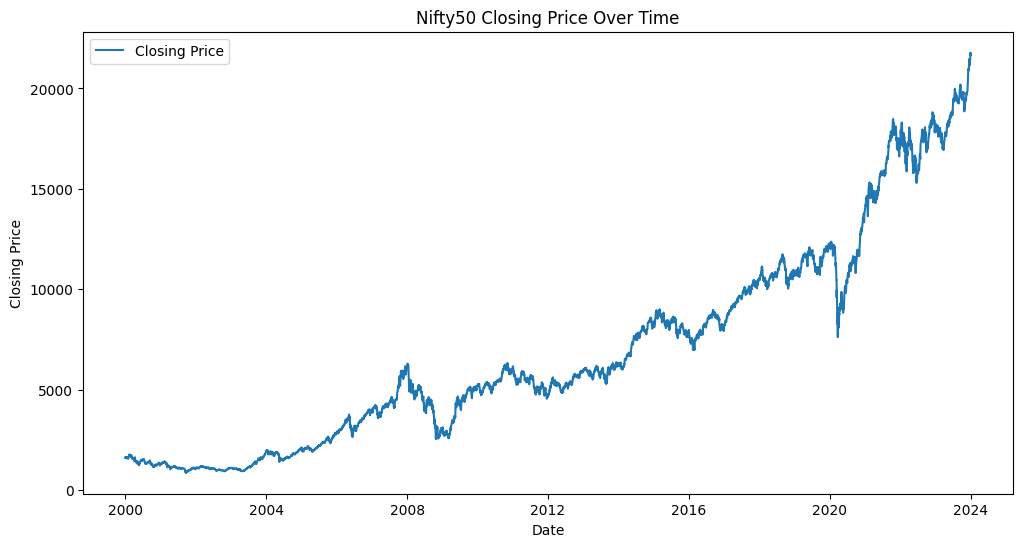

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Close'], label='Closing Price')
plt.title('Nifty50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [15]:
# Calculate moving averages
df1['50_MA'] = df1['Close'].rolling(window=50).mean()
df1['200_MA'] = df1['Close'].rolling(window=200).mean()


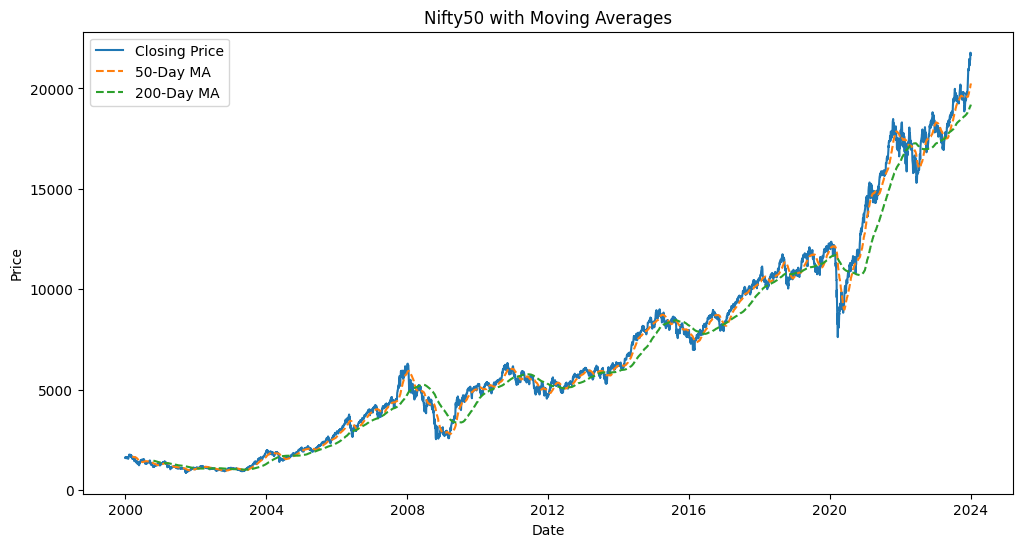

In [16]:
# Calculate moving averages
nifty50_df['50_MA'] = nifty50_df['Close'].rolling(window=50).mean()
nifty50_df['200_MA'] = nifty50_df['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Close'], label='Closing Price')
plt.plot(df1['Date'],df1['50_MA'], label='50-Day MA', linestyle='--')
plt.plot(df1['Date'],df1['200_MA'], label='200-Day MA', linestyle='--')
plt.title('Nifty50 with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


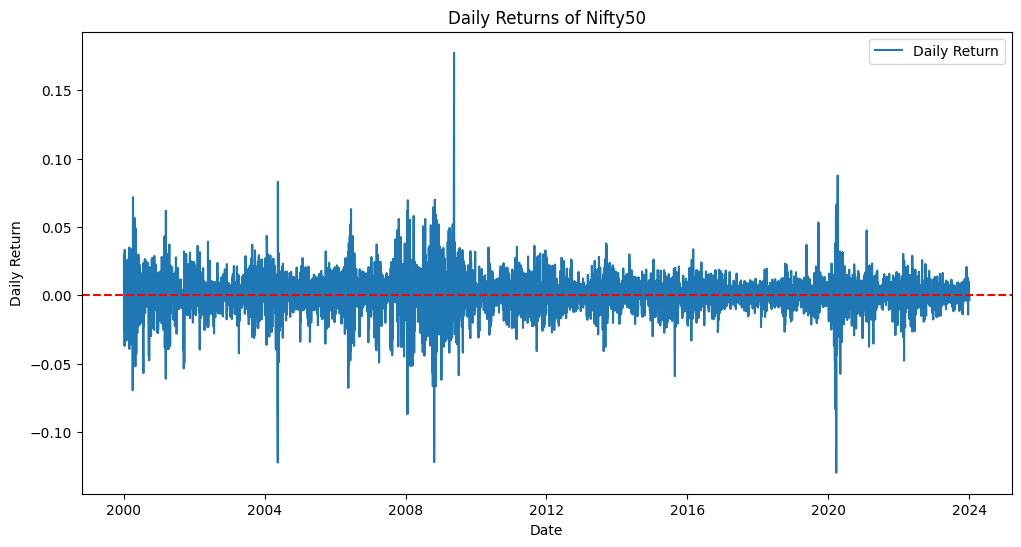

In [17]:
# Calculate daily returns
nifty50_df['Daily_Return'] = nifty50_df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(nifty50_df['Date'], nifty50_df['Daily_Return'], label='Daily Return')
plt.axhline(0, color='red', linestyle='--')
plt.title('Daily Returns of Nifty50')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


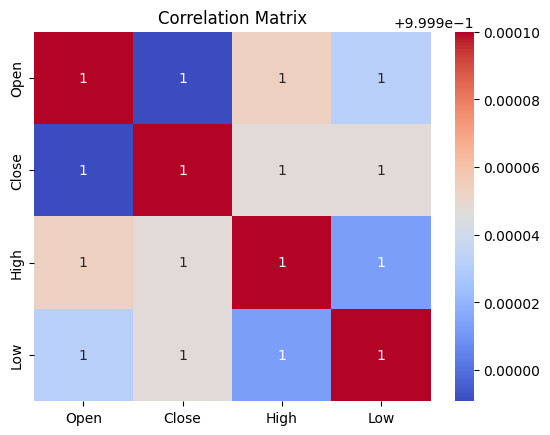

In [18]:
# Correlation matrix
correlation_matrix = nifty50_df[['Open', 'Close', 'High', 'Low']].corr()

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [20]:
# Convert the Date column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])


In [21]:
# Extract month and year from Date
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year


In [24]:
# Calculate average monthly closing prices
monthly_performance = df1.groupby('Month')['Close'].mean()


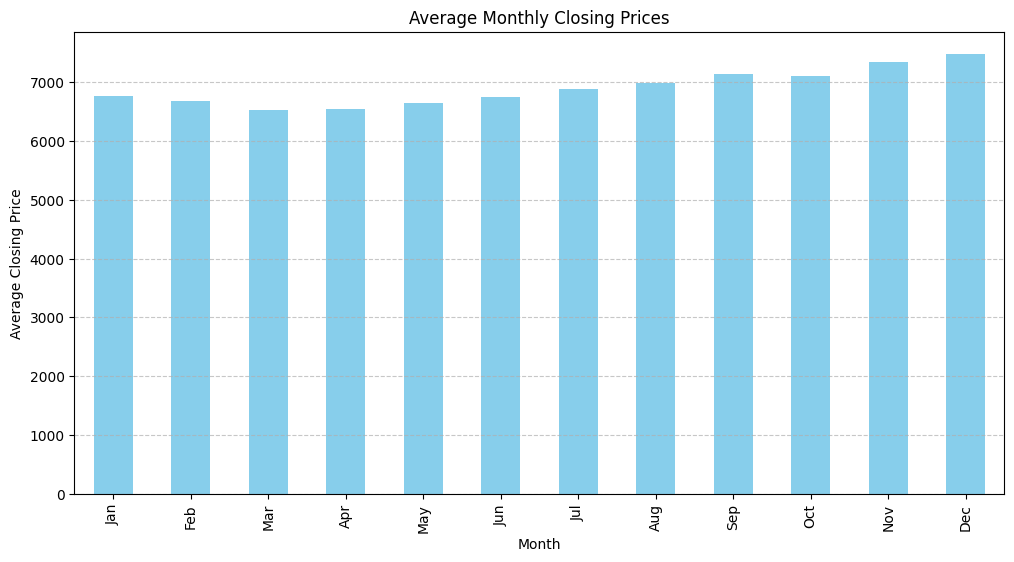

In [25]:
import matplotlib.pyplot as plt

# Plot the average monthly performance
plt.figure(figsize=(12, 6))
monthly_performance.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Closing Prices')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Summarize findings 


Trends in stock performance.
High/low volatility periods.
Seasonal patterns or anomalies.
